In [2]:
import torch

In [2]:
torch.__version__

'1.12.1+cu116'

In [13]:
x=torch.randn(3,3,3)#构造一个3*3*3的张量，每个元素都从均值0，标准差为1的标准正态分布取值
x

tensor([[[ 0.9971,  1.0977, -0.6548],
         [-0.9203,  0.6339,  1.5487],
         [-0.9210,  0.1612,  0.5627]],

        [[ 0.4903,  1.3551, -0.8745],
         [ 0.1611, -1.0851, -1.7764],
         [-1.7229, -2.6177,  1.2971]],

        [[-0.6360, -0.2262, -1.6790],
         [-0.5665, -0.3319, -1.2621],
         [ 0.0250, -1.6080,  1.5135]]])

* tensor是pytroch最基础的组成，相当于砖，所有的操作都是基于这个格式。

### 初始化

In [13]:
x=torch.arange(12) #创建一个行向量，包含从0开始的12个数
print(x)
x.shape

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


torch.Size([12])

In [11]:
x=torch.zeros(3,3,dtype=torch.long)#初始化全0矩阵
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [25]:
x=torch.empty(3,3) #初始化一个空矩阵，里面的数近乎是0
print(x)

tensor([[ 0.0000e+00, -1.5846e+29,  4.6847e+21],
        [ 3.6902e+19,  9.8091e-45,  1.8750e+00],
        [ 0.0000e+00,  1.8750e+00,  0.0000e+00]])


In [15]:
x=x.new_ones(5,3,dtype=torch.double) #初始化全1的矩阵
x_1=torch.randn_like(x,dtype=torch.float) #随机赋值
print(x)
print(x_1)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.1618,  0.3646, -1.1965],
        [ 0.0901,  0.8166,  2.1750],
        [-0.0695,  0.8647,  0.9328],
        [ 0.3932, -0.5875,  0.4524],
        [-0.6571, -1.9826,  0.3405]])


In [16]:
x.shape #查询张量的形状

torch.Size([5, 3])

In [17]:
x.size()#查询张量的大小

torch.Size([5, 3])

In [18]:
x.numel()#查询张量元素个数

15

In [30]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])#也可以直接用list的方式指定张量的数值

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 基本计算方法

* 对于具有相同形状的张量，常见标量算数运算符：+，-，X，/ 和 ** 都可以升级为按张量元素运算。

In [34]:
x=torch.zeros(3,3,dtype=torch.long)
y=torch.ones(3,3,dtype=torch.long)
print(x)
print(y)
print(x+y)
torch.add(x,y,out=m) #可以指定输出
print(m)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [13]:
x=torch.tensor([1,2,4,8])
torch.exp(x)#求e的幂运算

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

* 对张量中的所有元素进行求和，会产生一个单元素张量。

In [14]:
x.sum()

tensor(15)

### 索引

In [75]:
x=torch.rand(5,3)
print(x)
y=x[3,:2] #索引里面带的数字为第3+1行的：2片段
print(y)
y+=1 #索引出来的结果与原数据共享内存，也即修改⼀个，另⼀个会跟着修改。
print(y)
print(x[3,:2])

tensor([[0.4240, 0.5663, 0.1327],
        [0.3214, 0.0229, 0.1923],
        [0.2479, 0.9144, 0.1283],
        [0.9712, 0.7739, 0.1685],
        [0.8109, 0.0944, 0.4561]])
tensor([0.9712, 0.7739])
tensor([1.9712, 1.7739])
tensor([1.9712, 1.7739])


In [3]:
import torch
import numpy as np
x=torch.rand(3,5)
print(x)
x[1,2]=9 #可以通过索引赋值
print(x)

tensor([[0.1111, 0.7556, 0.9046, 0.2639, 0.1440],
        [0.2357, 0.3994, 0.8584, 0.8438, 0.0172],
        [0.2811, 0.8119, 0.7136, 0.5025, 0.8260]])
tensor([[0.1111, 0.7556, 0.9046, 0.2639, 0.1440],
        [0.2357, 0.3994, 9.0000, 0.8438, 0.0172],
        [0.2811, 0.8119, 0.7136, 0.5025, 0.8260]])


In [5]:
x[0:2,:]=9 #还可以为多个元素赋值。本例对第1,2行所有列赋值9
x

tensor([[9.0000, 9.0000, 9.0000, 9.0000, 9.0000],
        [9.0000, 9.0000, 9.0000, 9.0000, 9.0000],
        [0.2811, 0.8119, 0.7136, 0.5025, 0.8260]])

### 基本操作

In [23]:
x=torch.randn(4,4,4) #矩阵维度为4*4*4
y=x.view(64) #拉成一维，但必须为64，其他数字会报错;但实际上，x的维度是不会改变的，只是改变了x的视角
z=x.view(16,4) #改成二维
m=x.view(-1,4,2) #三维变换，-1为自动计算该维
n=x.view(-1,8) #改成二维，其中一维自动计算
print(x.size(),y.size(),z.size(),m.size(),n.size())
print(x)
print(n)

torch.Size([4, 4, 4]) torch.Size([64]) torch.Size([16, 4]) torch.Size([8, 4, 2]) torch.Size([8, 8])
tensor([[[-0.9957, -1.5283, -1.6896, -1.2061],
         [-0.2836, -0.5924, -1.2302, -0.4813],
         [ 1.1485, -0.1400, -0.6939,  2.0506],
         [-0.1252, -1.3282,  0.2586,  2.0797]],

        [[-0.5348,  0.6071,  0.8130, -1.2451],
         [-0.2168, -0.7555,  0.1443,  0.0525],
         [-0.5824, -0.9236, -0.8844,  1.6130],
         [ 0.8998,  1.1626,  0.2959, -1.1470]],

        [[-0.1761, -0.8108,  0.8976, -0.3051],
         [ 0.1750,  1.1891, -0.5179,  1.2997],
         [-0.7378,  0.1204,  0.1317, -1.2313],
         [ 0.4601,  0.1559, -0.7458, -1.4825]],

        [[ 1.2138, -0.1237,  0.1363, -0.7136],
         [-0.0868, -0.6505, -0.2575,  0.0608],
         [-0.4845,  0.2019, -1.4019, -1.3822],
         [ 0.3971,  2.0497,  0.1520, -0.5565]]])
tensor([[-0.9957, -1.5283, -1.6896, -1.2061, -0.2836, -0.5924, -1.2302, -0.4813],
        [ 1.1485, -0.1400, -0.6939,  2.0506, -0.1252, -1.3

In [29]:
x=torch.arange(12)
x_1=x.reshape(3,4)#改变张量的形状，但不改变元素的数量和元素的值
x_2=x.reshape(-1,6)#可以用-1调用自动计算维度的功能
print(x,'\n',x_1,'\n',x_2)
x #x还是没有改变

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]) 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) 
 tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [19]:
import numpy as np

In [12]:
a=torch.ones(3,3,dtype=torch.int) #为tensor格式
b=a.numpy() #转化为array格式
a,b #torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量

(tensor([[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]], dtype=torch.int32),
 array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]))

In [13]:
import numpy as np
a=np.ones(3) #numpy格式
b=torch.from_numpy(a) #转化为tensor格式
a,b

(array([1., 1., 1.]), tensor([1., 1., 1.], dtype=torch.float64))

In [14]:
a=torch.tensor([3.5])
a,a.item(),int(a) #可以调用item函数,将大小为1的张量转换为Python标量

(tensor([3.5000]), 3.5, 3)

* 张量连接（concatenate）

In [11]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2, 1, 4, 3], [1, 2, 3.0, 4], [4, 3, 2, 1]])#其中任意一个float类型，按照广播机制，导致整个连接为float类型
print(X,'\n',Y)
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)#第一个输出张量按照轴-0连接，第二个输出张量按照轴-1连接

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]) 
 tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])


(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
X==Y #通过逻辑运算符构建二元张量,如果X和Y在该位置相等，则新张量中相应项的值为1

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

### 矩阵求导

In [32]:
x=torch.rand(3,4,requires_grad=True) #请求追踪路径
x

tensor([[0.0318, 0.0060, 0.2856, 0.8253],
        [0.3336, 0.8531, 0.4782, 0.4526],
        [0.6671, 0.7183, 0.7352, 0.6099]], requires_grad=True)

In [3]:
x=torch.ones(3,3,requires_grad=True)
print(x)
print(x.grad_fn)
y=x+2
print(y)
print(y.grad_fn)
print(x.is_leaf,y.is_leaf)
z=y*y*3
out=z.mean()
print(z,out)
out.backward()
print(x.grad)

out2=x.sum()
out2.backward()
print(x.grad) #这里的结果为以前积累的2+现在1=3
x.grad.data.zero_() #x的梯度清零
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
None
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward0>)
True False
tensor([[27., 27., 27.],
        [27., 27., 27.],
        [27., 27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [4]:
a=torch.randn(2,3)
a=((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
b=(a*a).sum(0)
print(b,b.grad_fn)

False
tensor([1.1825e+00, 1.2322e+03, 1.2053e+02], grad_fn=<SumBackward1>) <SumBackward1 object at 0x000002C65BC11280>


In [5]:
x=torch.tensor([1.0,2.0,3.0,4.0],requires_grad=True)
y=2*x
z=y.view(2,2)
print(z)
v=torch.tensor([[1,1],[1,1]],dtype=torch.float)
z.backward(v)
print(x.grad)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward0>)
tensor([2., 2., 2., 2.])


### 广播机制

先适当复制元素使这两个 Tensor 形状相同后再按元素运算。

In [17]:
x=torch.arange(2).view(1,2) #arange为一维取值后，拉成1行2列的tensor
print(x)
y=torch.arange(3).view(3,1) #arange一维取值后，拉成3行1列的tensor
print(y)
print(x+y)

tensor([[0, 1]])
tensor([[0],
        [1],
        [2]])
tensor([[0, 1],
        [1, 2],
        [2, 3]])


### 节省内存与时间

In [9]:
import torch
from time import time

a=torch.ones(1000)
b=torch.ones(1000)

start=time()#程序执行开始时间
c=torch.zeros(1000)
for i in range(1000):
    c[i]=a[i]+b[i]
print(time()-start)#计算程序执行时间

0.01695561408996582


In [12]:
start=time()#程序执行开始时间
d=a+b
print(time()-start)#计算程序执行时间

0.0


In [6]:
import torch
import numpy as np
x=torch.rand(3,5)
y=torch.rand(3,5)
before=id(y)
y=y+x # 运行Y = Y + X后，我们会发现id(Y)指向另一个位置
id(y)==before

False

In [8]:
z=torch.zeros_like(y)#创建一个新的矩阵Z，其形状与另一个Y相同,使用zeros_like来分配一个全的块
print('id(z):',id(z))
z=x+y #用固定位置来消化随机内存
print('id(z):',id(z))

id(z): 2749069143712
id(z): 2749034459280


In [9]:
before=id(x)
x+=y #为X[:] = X + Y,占用以前x的内存
id(x)==before

True

### 数据预处理

In [18]:
import os

os.makedirs(os.path.join('C:/Users/shfdragon/Dropbox/python/data', 'py_data'), exist_ok=True)#创建文件夹
data_file = os.path.join('C:/Users/shfdragon/Dropbox/python/data', 'py_data', 'house_tiny.csv') #添加文件，拼接文件路径
with open(data_file, 'w') as f: #with无论出什么问题都能关闭文件退出
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [19]:
import pandas as pd #调用pandas

data=pd.read_csv(data_file) #读取文件
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 生成随机数据集

features: tensor([ 2.0927, -0.9053]) 
label: tensor([11.4690])


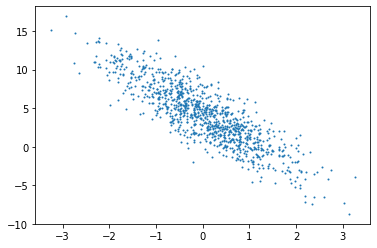

In [2]:
import numpy as np
import torch
import random
# from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline
# from mpl_toolkits.mplot3d import Axes3D 

def synthetic_data(w,b,num_examples): #定义数据集生产函数，传入w,b,样本数
    #生成y=Xw+b+噪声
    x=torch.normal(0,1,(num_examples,len(w))) #生成期望为0，方差为1的正态分布样本，样本维度与w相同
    y=torch.matmul(x,w)+b #matmul为矩阵相乘
    y+=torch.normal(0,0.01,y.shape) #参数y.shape为返回值形式
    return x,y.reshape((-1,1)) #-1为根据另一个维度为1，自动计算该维度值

true_w=torch.tensor([2,-3.4]) #w为两个维度
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)
# features中的每⼀⾏都包含⼀个⼆维数据样本，labels中的每⼀⾏都包含⼀维标签值（⼀个标量）。

print('features:',features[0],'\nlabel:',labels[0])

plt.scatter(features[:,1].numpy(),labels.numpy(),1)


### 读取数据集

In [3]:
def data_iter(batch_size,features,labels): #定义数据读取函数，打乱数据集中的样本并以小批量方式获得数据
    num_examples = len(features) #读入样本数量，len返回为特征矩阵元素的个数   
    indices = list(range(num_examples)) #用样本数量建立列表
    random.shuffle(indices) #将列表随机打乱顺序
    for i in range(0,num_examples,batch_size): #在样本数量范围内，按照小批量分队取值
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)]) #对打乱顺序后的列表按照给定数量分段取值，最后是判断如果样本数量不足一队，就此罢休;生成矩阵格式的随机分段列表
        yield features[batch_indices], labels[batch_indices] #逐批返回特征值和标签
   
 #直观感受小批量运算：读取第一个小批量数据样本并打印
    
batch_size =10
for x,y in data_iter(batch_size,features,labels):
    print(x, '\n',y)
    break #运行迭代，会连续不断获得不同的小批量，直至遍历完整数据集。

tensor([[-0.5491,  1.7952],
        [-0.5514, -1.0891],
        [-0.6482, -0.5254],
        [ 0.1770,  0.6518],
        [-0.6588,  0.7711],
        [ 0.4761,  0.8461],
        [-2.3033,  0.0821],
        [-0.2968, -1.2688],
        [ 1.1219, -1.5348],
        [ 0.5071, -0.5428]]) 
 tensor([[-2.9924],
        [ 6.8095],
        [ 4.6987],
        [ 2.3329],
        [ 0.2607],
        [ 2.2693],
        [-0.7150],
        [ 7.9215],
        [11.6651],
        [ 7.0495]])


### 初始化线性回归参数

In [ ]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True) #w初始值为正态分布的随机数，2行1列矩阵，即2个维度，要求能反向求导跟踪调整
b = torch.zeros(1, requires_grad=True) #偏置b为初始值为0的1维矩阵，同样需要反向求导跟踪调整

def linreg(X,w,b): #定义线性回归模型，X为特征=features
    return torch.matmul(X,w)+b #虽然b是标量，但是根据广播机制，所有向量分量都会+b

### 定义损失函数

In [ ]:
def squared_loss(y_hat,y): #方差损失
    return (y_hat-y.reshape(y_hat.shape))**2/2

### 梯度下降算法

In [ ]:
def sgd(params, lr, batch_size):#传入参数集合，学习速率，批量大小
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

Text(0, 0.5, 'ylabel')

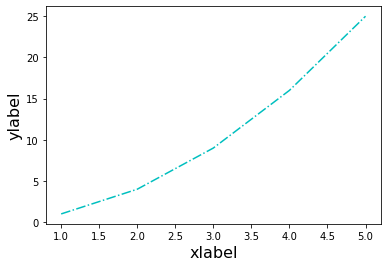

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4,5],[1,4,9,16,25],'c-.')
plt.xlabel('xlabel',fontsize=16)
plt.ylabel('ylabel',fontsize=16)

### 简单实现线性回归

* 生成数据集

In [2]:
import numpy as np
import torch
import random
from torch.utils import data

def synthetic_data(w,b,num_examples): #定义数据集生产函数，传入w,b,样本数
    #生成y=Xw+b+噪声
    x=torch.normal(0,1,(num_examples,len(w))) #生成期望为0，方差为1的正态分布样本，样本维度与w相同
    y=torch.matmul(x,w)+b #matmul为矩阵相乘
    y+=torch.normal(0,0.01,y.shape) #参数y.shape为返回值形式
    return x,y.reshape((-1,1)) #-1为根据另一个维度为1，自动计算该维度值

true_w=torch.tensor([2,-3.4]) #w为两个维度
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)
# features中的每⼀⾏都包含⼀个⼆维数据样本，labels中的每⼀⾏都包含⼀维标签值（⼀个标量）。

* 读取数据集